In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('1730285881-Airbnb_Open_Data.xlsx')

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [6]:
df.duplicated().value_counts

<bound method IndexOpsMixin.value_counts of 0         False
1         False
2         False
3         False
4         False
          ...  
102594     True
102595     True
102596     True
102597     True
102598     True
Length: 102599, dtype: bool>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [8]:
df.describe()

,id,host id,lat,long,instant_bookable,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.025990e+05,1.025990e+05,102591.000000,102591.000000,102494.000000,102385.000000,102352.000000,102326.000000,102190.000000,102416.000000,86706,86720.000000,102273.000000,102280.000000,102151.000000
mean,2.914623e+07,4.925411e+10,40.728094,-73.949644,0.497785,2012.487464,625.293536,125.026924,8.135845,27.483743,2019-06-12 03:40:52.065601024,1.374022,3.279106,7.936605,141.133254
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,0.000000,2003.000000,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.508581e+07,2.458333e+10,40.688740,-73.982580,0.000000,2007.000000,340.000000,68.000000,2.000000,1.000000,2018-10-28 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.913660e+07,4.911774e+10,40.722290,-73.954440,0.000000,2012.000000,624.000000,125.000000,3.000000,7.000000,2019-06-14 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.320120e+07,7.399650e+10,40.762760,-73.932350,1.000000,2017.000000,913.000000,183.000000,5.000000,30.000000,2019-07-05 00:00:00,2.000000,4.000000,2.000000,269.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,1.625751e+07,2.853900e+10,0.055857,0.049521,0.499998,5.765556,331.671614,66.325739,30.553781,49.508954,NaN,1.746621,1.284657,32.218780,135.435024


In [9]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53701
Private room,46556
Shared room,2226
Hotel room,116


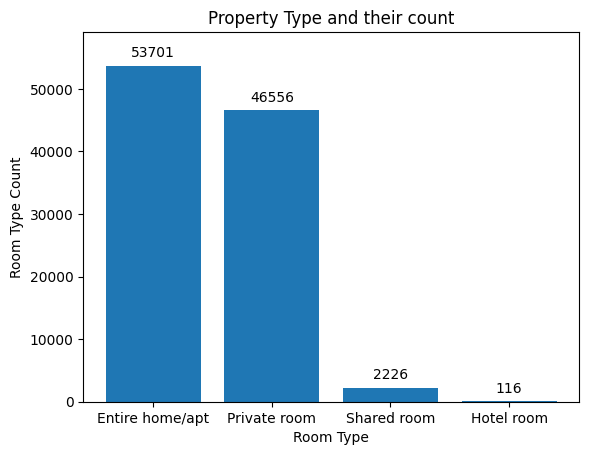

In [10]:
property_types = df['room type'].value_counts().to_frame()
room_type_bar = plt.bar(property_types.index, property_types.loc[:,"count"]);
plt.bar_label(room_type_bar, labels = property_types.loc[:,"count"], padding = 4 );
plt.ylim([0, property_types['count'].max() + property_types['count'].max()*0.1]); # Adjusted y-limit dynamically
plt.xlabel('Room Type');
plt.ylabel('Room Type Count');
plt.title('Property Type and their count');
plt.show()

In [11]:
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43792
Brooklyn,41842
Queens,13267
Bronx,2712
Staten Island,955
brookln,1
manhatan,1


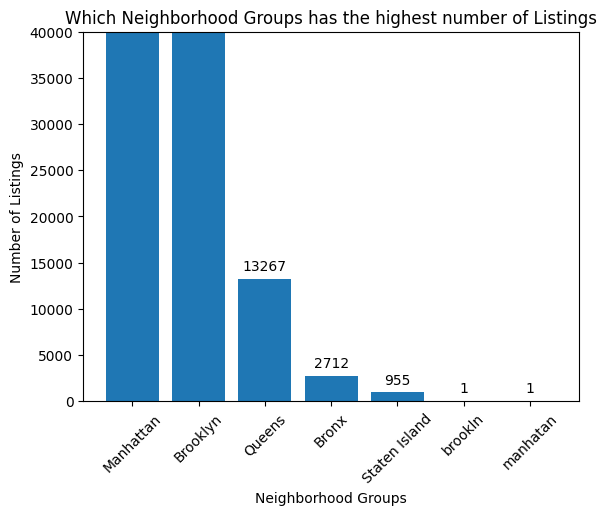

In [12]:
hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:,"count"]);
plt.bar_label(hood_group_bar, labels = hood_group.loc[:,"count"], padding = 4 );
plt.ylim([0, 40000]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation = 45);
plt.title('Which Neighborhood Groups has the highest number of Listings');

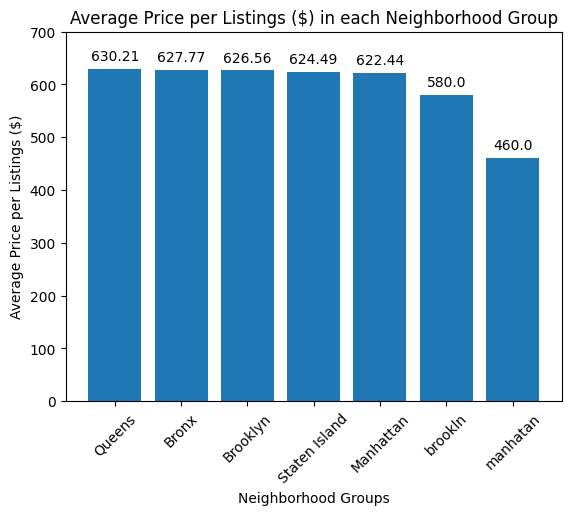

In [14]:
avg_price = df.groupby('neighbourhood group')['price'].mean().sort_values(ascending = False).to_frame()
avg_price_bar = plt.bar(avg_price.index, avg_price.loc[:,"price"]);
plt.bar_label(avg_price_bar, labels = round(avg_price.loc[:,"price"], 2), label_type = 'edge', padding = 4 );
plt.ylim([0, 700]);
plt.xlabel('Neighborhood Groups');
plt.ylabel('Average Price per Listings ($)');
plt.xticks(rotation = 45);
plt.title('Average Price per Listings ($) in each Neighborhood Group');

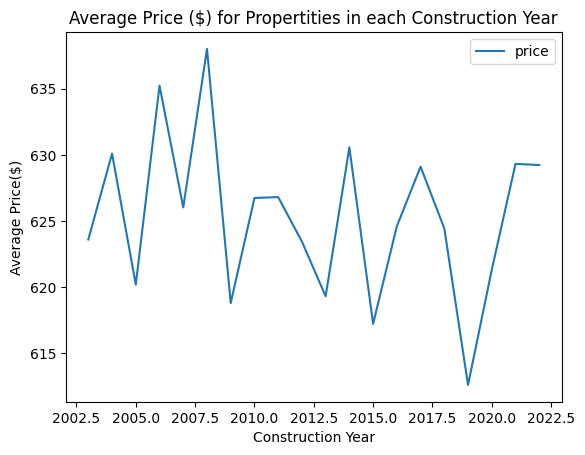

In [15]:
df.groupby(df['Construction year'])['price'].mean().to_frame().plot();
plt.xlabel('Construction Year');
plt.ylabel('Average Price($)');
plt.title('Average Price ($) for Propertities in each Construction Year');


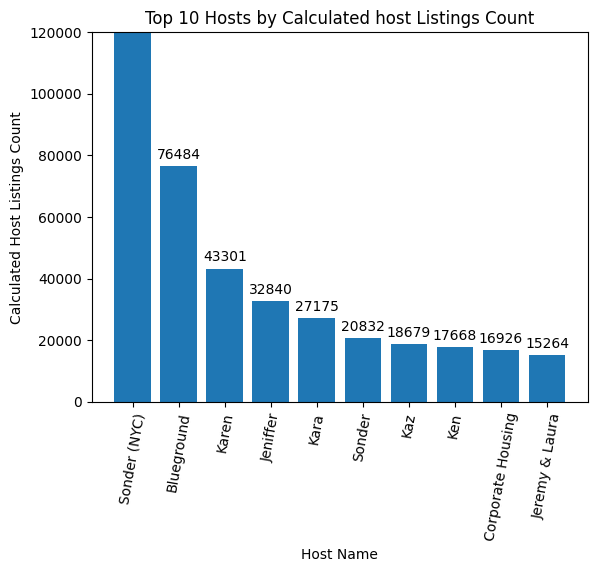

In [16]:
hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending = False).nlargest(10).to_frame()
hosts_bar = plt.bar(hosts.index, hosts.loc[:, 'calculated host listings count']);
plt.bar_label(hosts_bar, label = hosts.loc[:,"calculated host listings count"], label_type = 'edge', padding = 3);
plt.xlabel('Host Name');
plt.ylabel('Calculated Host Listings Count');
plt.xticks(rotation = 80);
plt.ylim(0, 120000)
plt.title('Top 10 Hosts by Calculated host Listings Count');

In [17]:
review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending = False).to_frame()
review

,review rate number
host_identity_verified,
verified,3.286684
unconfirmed,3.271767


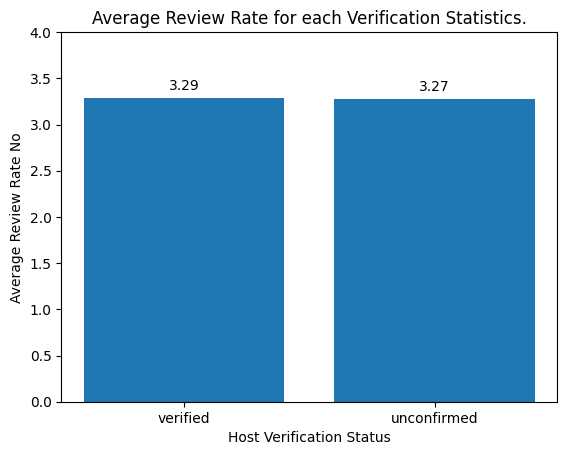

In [18]:
review_bar = plt.bar(review.index, review.loc[:,"review rate number"]);
plt.bar_label(review_bar, labels = round(review.loc[:,"review rate number"], 2), padding = 4 );
plt.ylim([0, 4]);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate No');
plt.title('Average Review Rate for each Verification Statistics.');

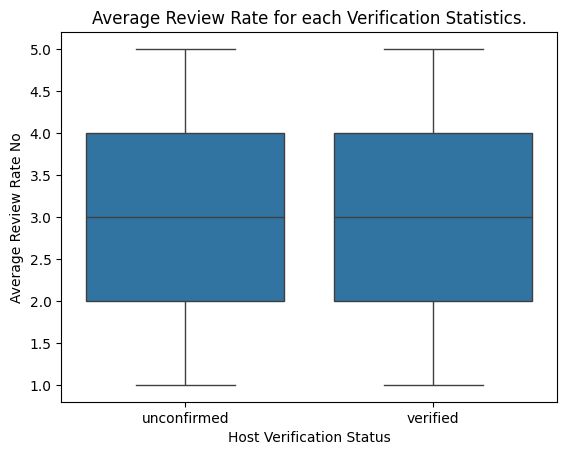

In [19]:
base_color = sns.color_palette()[0]
sns.boxplot(data = df, x = "host_identity_verified", y = "review rate number", color = base_color);
plt.xlabel('Host Verification Status');
plt.ylabel('Average Review Rate No');
plt.title('Average Review Rate for each Verification Statistics.');

In [21]:
df['price'].corr(df['service fee'])

np.float64(0.9999908755543349)

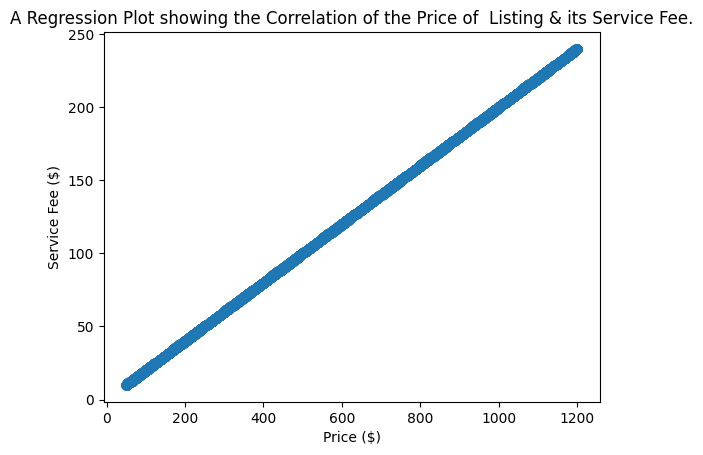

In [22]:
sns.regplot(df, x = 'price', y = 'service fee');
plt.xlabel('Price ($)');
plt.ylabel('Service Fee ($)');
plt.title('A Regression Plot showing the Correlation of the Price of  Listing & its Service Fee.');

In [23]:
ARRN = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
ARRN

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346457
                    Private room               3.329706
                    Shared room                3.264957
Brooklyn            Entire home/apt            3.250378
                    Hotel room                 3.750000
                    Private room               3.264465
                    Shared room                3.336983
Manhattan           Entire home/apt            3.275807
                    Hotel room                 3.500000
                    Private room               3.277576
                    Shared room                3.257459
Queens              Entire home/apt            3.349154
                    Hotel room                 3.750000
                    Private room               3.315585
                    Shared room                3.377778
Staten Island       Entire home/apt            3.329087
                    Private room               3.479482
                    Shared room                3.533333
brookln             Private room               4.000000
manhatan            Private room               3.000000

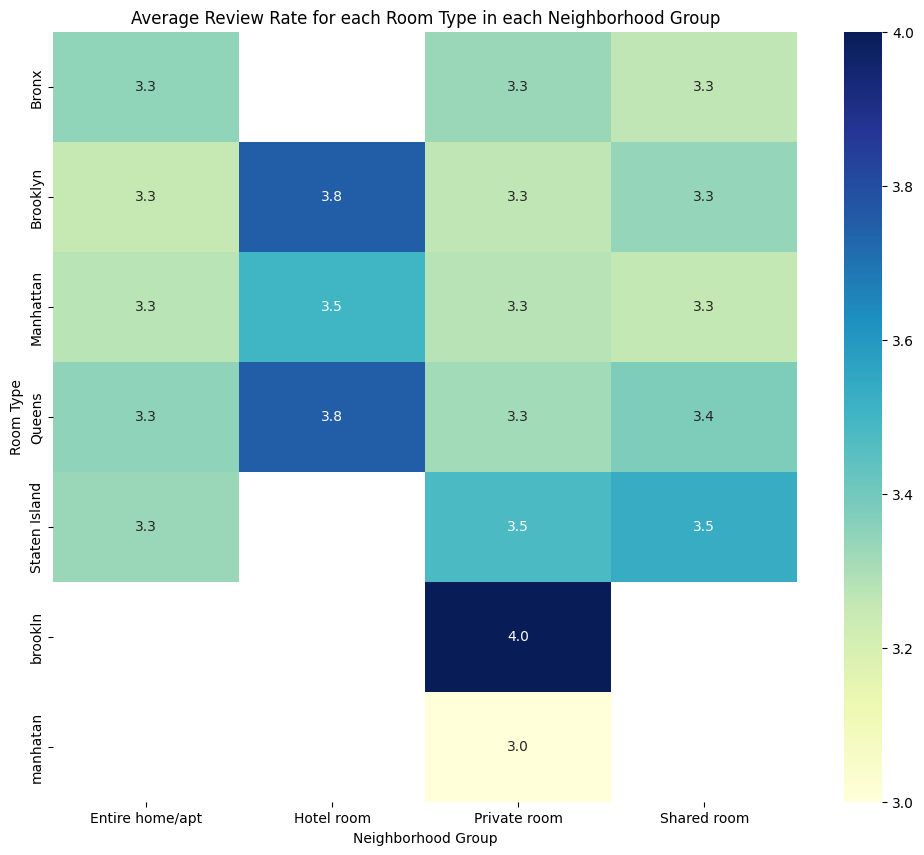

In [24]:
plt.figure(figsize = [12,10]);
sns.heatmap(data = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().unstack(), annot=True, fmt=".1f", cmap="YlGnBu");
plt.xlabel('Neighborhood Group');
plt.ylabel('Room Type');
plt.title('Average Review Rate for each Room Type in each Neighborhood Group');

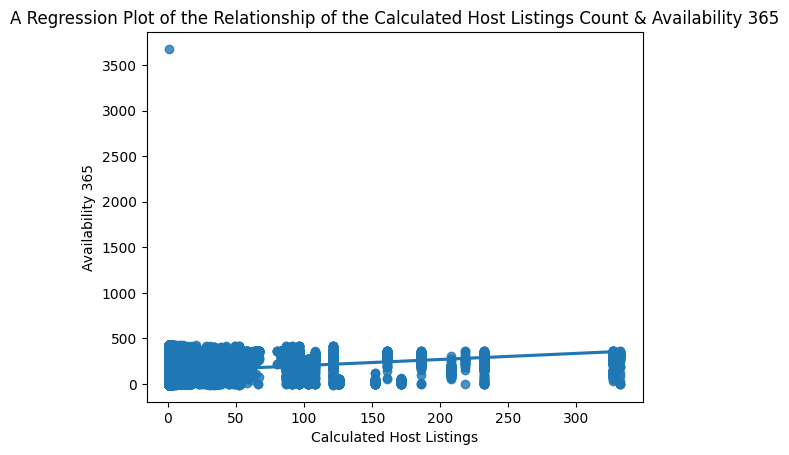

In [25]:
sns.regplot(df, x = 'calculated host listings count', y = 'availability 365');
plt.xlabel('Calculated Host Listings');
plt.ylabel('Availability 365');
plt.title('A Regression Plot of the Relationship of the Calculated Host Listings Count & Availability 365');

In [26]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.1591942422813064)